# PyTorch and Value function approximation

RLDMUU, UniNE 2025, jakub.tluczek@unine.ch

In [41]:
import torch
import numpy as np

### Tensors

Tensor is the data structure specific to deep learning frameworks. They're designed to run on hardware accelerators (GPUs), making training times significantly shorter, as well as they're optimized for automatic differentiation, a central concept in deep learning. They can be initialized in following ways:

In [42]:
# matrix which will serve as the base for tensor initializations
raw_data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

print(f"Data type: {type(raw_data)}")
print(raw_data)

# creating tensor
tensor_from_raw_data = torch.tensor(raw_data)

print(f"\nData type: {type(tensor_from_raw_data)}")
print(tensor_from_raw_data)


Data type: <class 'list'>
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

Data type: <class 'torch.Tensor'>
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


Tensors can also be created from numpy arrays, retaining their attributes:

In [43]:
# creating a numpy array from the data, with float datatype
numpy_from_raw_data = np.array(raw_data, dtype=np.float64)

print(f"Data type: {type(numpy_from_raw_data)}")
print(numpy_from_raw_data)

tensor_from_numpy = torch.from_numpy(numpy_from_raw_data)

print(f"\nData type: {type(tensor_from_numpy)}")
print(tensor_from_numpy)

print(f"\nData type: {type(tensor_from_numpy.numpy())}")
print(tensor_from_numpy.numpy())


Data type: <class 'numpy.ndarray'>
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Data type: <class 'torch.Tensor'>
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)

Data type: <class 'numpy.ndarray'>
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


Single element tensors, used for example as trackers of some statistic, can be converted into numerical value by calling the `item()` method:

In [44]:
single_element_tensor = torch.tensor(9)

print(f"Data type: {type(single_element_tensor)}")
print(single_element_tensor)

print(f"\nData type: {type(single_element_tensor.item())}")
print(single_element_tensor.item())


Data type: <class 'torch.Tensor'>
tensor(9)

Data type: <class 'int'>
9


Just as in numpy, tensors with predetermined values can be created, based only on shape (passed to the function as a tuple).

In [45]:
shape = (2,3,)

print("Random tensor")
print(torch.rand(shape))

print("\nTensor of zeros")
print(torch.zeros(shape))

print("\nTensor of ones")
print(torch.ones(shape))

print("\nTensor of arbitrary values")
print(torch.full(shape, 9))

print("\nEmpty tensor")
print(torch.empty(shape))

Random tensor
tensor([[0.2466, 0.9840, 0.9272],
        [0.3458, 0.7912, 0.2424]])

Tensor of zeros
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Tensor of ones
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Tensor of arbitrary values
tensor([[9, 9, 9],
        [9, 9, 9]])

Empty tensor
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [46]:
print("Arange vector")
print(torch.arange(5))

print("\nLinear space")
print(torch.linspace(start=1, end=15, steps=7))

print("\nDiagonal matrix")
print(torch.eye(3))

Arange vector
tensor([0, 1, 2, 3, 4])

Linear space
tensor([ 1.0000,  3.3333,  5.6667,  8.0000, 10.3333, 12.6667, 15.0000])

Diagonal matrix
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


Each tensor is created on CPU device as a default. If CUDA (Nvidia's parallel computing platform) is available, then tensor can be moved to CUDA by `to` method:

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"CUDA is available: {torch.cuda.is_available()}")

print(f"Default device: {tensor_from_raw_data.device}")
print(f"Mapped to CUDA: {tensor_from_raw_data.to(device=device).device}")

CUDA is available: False
Default device: cpu
Mapped to CUDA: cpu


Each tensor can be subject to several operations:

In [48]:
# Slicing
print(tensor_from_raw_data)
print(tensor_from_raw_data[1])
print(tensor_from_raw_data[:, 1])
print(tensor_from_raw_data[:, -1])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([4, 5, 6])
tensor([2, 5, 8])
tensor([3, 6, 9])


In [49]:
# concatenation
col1 = tensor_from_raw_data[:, 0]
col2 = tensor_from_raw_data[:, 1]
col3 = tensor_from_raw_data[:, -1]

print(torch.cat((col1, col2, col3)))


tensor([1, 4, 7, 2, 5, 8, 3, 6, 9])


In [50]:
# stacking 
print([col1, col2, col3])
print(torch.stack([col1, col2, col3]))

[tensor([1, 4, 7]), tensor([2, 5, 8]), tensor([3, 6, 9])]
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


In [51]:
# permuting dimensions
x = torch.randn(2, 4, 3)
print(x)
print(f"Tensor size: {x.size()}")
x_p = torch.permute(x, (1, 2, 0))
print(x_p)
print(f"Tensor size: {x_p.size()}")

tensor([[[-0.0423,  0.5605, -0.0405],
         [-0.8575,  1.6646,  0.5269],
         [-2.2264,  0.6034,  0.2005],
         [-1.1817, -0.6824, -1.4117]],

        [[-1.4857, -0.0395, -1.0686],
         [-0.5139,  0.5180, -0.6239],
         [ 2.2316,  0.9230,  0.1305],
         [ 0.3880,  0.5890,  1.3014]]])
Tensor size: torch.Size([2, 4, 3])
tensor([[[-0.0423, -1.4857],
         [ 0.5605, -0.0395],
         [-0.0405, -1.0686]],

        [[-0.8575, -0.5139],
         [ 1.6646,  0.5180],
         [ 0.5269, -0.6239]],

        [[-2.2264,  2.2316],
         [ 0.6034,  0.9230],
         [ 0.2005,  0.1305]],

        [[-1.1817,  0.3880],
         [-0.6824,  0.5890],
         [-1.4117,  1.3014]]])
Tensor size: torch.Size([4, 3, 2])


In [52]:
# squeezing (removing dimensions of size 1)
x = torch.zeros(2,1,2,1,2)
print(x)
print(f"Size: {x.size()}")
print(x.squeeze())
print(f"Size: {x.squeeze().size()}")


tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])
Size: torch.Size([2, 1, 2, 1, 2])
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])
Size: torch.Size([2, 2, 2])


In [53]:
# unsqueezing (adding dimension, i.e. adding another brackets in the tensor)
x = torch.tensor([1, 2, 3, 4])
print(x.size())
print(torch.unsqueeze(x, 0))
print(torch.unsqueeze(x, 0).size())
print(torch.unsqueeze(x, 1))
print(torch.unsqueeze(x, 1).size())

torch.Size([4])
tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])


In [54]:
# view 
print(tensor_from_raw_data.view(9))
print(tensor_from_raw_data.view(3, -1))

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Neural networks

To construct neural network in PyTorch we have to use several building blocks available in `torch.nn` library

In [55]:
import torch.nn as nn
import torch.nn.functional as F

Simple neural network inherits from `nn.Module` class, which implements several crucial methods for neural network computations. At least `forward` method is always overwritten to declare the forward pass in the network. The structure of neural network should be specified in  `__init__`.

In [56]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, output_size)

    def forward(self, data):
        x = F.relu(self.linear1(data))
        x = F.relu(self.linear2(x))
        return self.linear3(x)

In [57]:
# declaring the instance of neural network model
model = NeuralNetwork(input_size=16, output_size=4, hidden_dim=32).to(device)

Following cell represents the typical flow for the classification problem, where class is assigned to the one that yields the biggest output:

In [58]:
# dummy input
x = torch.rand(16, device=device)
# scoring the model
output = model(x)
print(output)
# getting probabilities via the softmax function
probs = nn.Softmax(dim=0)(output)
# getting the class
choice = probs.argmax()
print(f"Class: {choice.item()}")

tensor([-0.0061, -0.0468,  0.1944,  0.2110], grad_fn=<ViewBackward0>)
Class: 3


### Automatic differentiation

Let's consider the following, simple computation graph - neural networks, though much more complicated, follow the same principle.

![image](comp-graph.png)

In [59]:
# input of zeros
x = torch.ones(5)
# target of zeros
y = torch.zeros(3)
# weights and biases
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
# result to be compared against y
z = torch.matmul(x, w) + b
# loss function
loss = F.binary_cross_entropy_with_logits(z, y)

Backward pass, used to compute gradients:

In [60]:
loss.backward()

Computed gradients:

In [61]:
print("Weight matrix")
print(w)
print("\nWeight matrix gradient")
print(w.grad)

Weight matrix
tensor([[-0.6454,  0.3370,  0.2454],
        [ 0.3044, -0.2567, -0.7409],
        [ 1.1230,  1.0866, -0.7360],
        [ 2.0734,  0.8887, -0.3463],
        [-0.2058,  1.4861, -1.5238]], requires_grad=True)

Weight matrix gradient
tensor([[0.3177, 0.2736, 0.0202],
        [0.3177, 0.2736, 0.0202],
        [0.3177, 0.2736, 0.0202],
        [0.3177, 0.2736, 0.0202],
        [0.3177, 0.2736, 0.0202]])


In [62]:
print("Bias vector")
print(b)
print("\nBias vector gradient")
print(b.grad)

Bias vector
tensor([ 0.3629, -2.0195,  0.3621], requires_grad=True)

Bias vector gradient
tensor([0.3177, 0.2736, 0.0202])


Gradients accumulation can be turned off either by `torch.no_grad` context manager, or by `detach`, which as name suggests, detaches tensor from the computation graph.

In [63]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

z = torch.matmul(x, w) + b 
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


PyTorch offers a wide range of optimizers, which apply the changes to parameters of the model with a given rate. One of the most popular is `Adam`, and we are going to use it throughout this exercise

In [64]:
optim = torch.optim.Adam(params=model.parameters(), lr=1e-3)

Let's go through the usual flow for updating the network:

In [65]:
# dummy input data
x = torch.rand(16, device=device)
# dummy target
dummy_target = torch.randn(4, device=device, dtype=torch.float)
# Mean squared error loss - PyTorch offers a wide variety of loss functions, with the ability to declare our own 
loss_fn = nn.MSELoss()

In [66]:
# resets preciously accumulated gradients to 0
optim.zero_grad()
# scoring the model
output = model(x)
# applying the loss function and computing gradients with backpropagation
loss = loss_fn(output, dummy_target)
loss.backward()
# applying the gradients to change the parameters
optim.step()

## Value function approximation - Semi gradient

The task here is to implement the value function approximation using neural network and semi gradient TD(0) algorithm for estimating $\hat{v} \approx v_{\pi}$

In [67]:
import gymnasium as gym
# declaring the environment
env = gym.make('CartPole-v1')
# getting initial state
state, info = env.reset()

In [68]:
state

array([-0.02071168, -0.00562686, -0.0059689 , -0.01244551], dtype=float32)

Declaring neural network which will approximate the function - technically any parametrized and differentiable function would work (with varying success probably). Feel free to design your own architecture.

In [69]:
class ValueFunction(nn.Module):
    def __init__(self, input_size, hidden_dim):
        super(ValueFunction, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, hidden_dim)
        self.linear4 = nn.Linear(hidden_dim, 1)

    def forward(self, data):
        x = F.relu(self.linear1(data))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        return self.linear4(x)

In [70]:
model = ValueFunction(4, 64).to(device)
optim = torch.optim.Adam(params=model.parameters(), lr=1e-4)

Declaring $\alpha$ and $\gamma$ for temporal update

In [71]:
alpha = 0.8
gamma = 0.95

As described in Chapter 9.3 of Sutton and Barto, update for each step is given as:

$w \leftarrow w + \alpha[R + \gamma \hat{v}(S', w) - \hat{v}(S, w)]\nabla\hat{v}(S,w) $

In [72]:
from tqdm import tqdm 
for _ in tqdm(range(10000)):
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info = env.step(action)

    optim.zero_grad()
    output = model(torch.tensor(state).to(device))
    loss = (alpha * (reward + gamma * model(torch.tensor(next_state).to(device)) - output))
    loss.backward()
    optim.step()

    if terminated or truncated:
        state, info = env.reset()
    else:
        state = next_state

100%|██████████| 10000/10000 [00:04<00:00, 2029.26it/s]


In [84]:
with torch.no_grad():
    print(model(torch.tensor([0.00, 0, 0, 0]).to(device)))

tensor([43421.9062])


In [74]:
env.close()

Similarly, we can consider a State-action approximation, which can be updated by:

$w \leftarrow w + \alpha[R + \gamma \hat{Q}(S', A', w) - \hat{Q}(S,A,w)]\nabla\hat{v}(S,w) $

We can assume that current policy is greedy.

In [75]:
env = gym.make('CartPole-v1')
state, info = env.reset()

In [76]:
Q = ValueFunction(5, 64).to(device)
optim = torch.optim.Adam(params=Q.parameters(), lr=1e-4)

In [77]:
for _ in tqdm(range(20000)):
    with torch.no_grad():
        action = torch.argmax(torch.cat((
                Q(torch.cat((torch.tensor(state).to(device), torch.tensor([0.]).to(device)))),
                Q(torch.cat((torch.tensor(state).to(device), torch.tensor([1.]).to(device))))))).item()
    next_state, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        state, info = env.reset()
        continue
    
    with torch.no_grad():
        next_action = torch.argmax(torch.cat((
                        Q(torch.cat((torch.tensor(next_state).to(device), torch.tensor([0.]).to(device)))),
                        Q(torch.cat((torch.tensor(next_state).to(device), torch.tensor([1.]).to(device))))))).item()

    optim.zero_grad()
    output = Q(torch.cat((torch.tensor(state).to(device), torch.tensor([action], dtype=torch.float).to(device))))
    loss = (alpha * (reward + gamma *  Q(torch.cat((torch.tensor(next_state).to(device), torch.tensor([next_action], dtype=torch.float).to(device)))) - output))
    loss.backward()
    optim.step()

    
    state = next_state

100%|██████████| 20000/20000 [00:10<00:00, 1884.17it/s]


In [85]:
with torch.no_grad():
    input_tensor = torch.cat((torch.tensor([0.00, 0, 0, 0]).to(device), torch.tensor([0.5]).to(device)))
    print(Q(input_tensor))

tensor([138308.0625])


### References
- PyTorch documentation
- Sutton, Barto. Reinforcement Learning, Chapter 9.3

In [86]:
w = torch.randn(8, requires_grad=True)
v = lambda w: [2*w[0]+w[7], 2*w[1]+w[7], 2*w[2]+w[7], 2*w[3]+w[7], 2*w[4]+w[7], 2*w[5]+w[7], 2*w[6]+w[7]]

In [87]:
w

tensor([ 1.1289, -0.0998, -1.4284,  0.1055,  0.4191,  1.2902, -0.7145,  2.0257],
       requires_grad=True)

In [89]:
v(w)

[tensor(4.2836, grad_fn=<AddBackward0>),
 tensor(1.8262, grad_fn=<AddBackward0>),
 tensor(-0.8311, grad_fn=<AddBackward0>),
 tensor(2.2368, grad_fn=<AddBackward0>),
 tensor(2.8640, grad_fn=<AddBackward0>),
 tensor(4.6061, grad_fn=<AddBackward0>),
 tensor(0.5967, grad_fn=<AddBackward0>)]

In [ ]:
P = np.zeros((7,2,7))
P[:,0,:-1] = 1/6
P[:, 1, 6] = 1

array([[[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        ]],

       [[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        ]],

       [[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        ]],

       [[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        ]],

       [[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.      

In [91]:
policy = np.zeros((7,2))
policy[:, 0] = 6/7
policy[:, 1] = 1/7

In [92]:
state = np.random.choice(6)
next_state = np.random.choice(7, p=P[state, np.random.choice(2, p=policy[state]), :])

In [ ]:
r = 0
loss = alpha * (r + gamma * v(w)[next_state] - v(w)[state])

In [ ]:
loss.backward()

In [ ]:
w.grad

tensor([ 1.5200,  0.0000, -1.6000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0400])

Update the $w$. Try and run this example multiple times and observe the value of $w_8$

In [100]:
EPOCHS = 100000
r = 0
alpha = 0.1
gamma = 0.95
w = torch.randn(8, requires_grad=True)
v = lambda w: [2*w[0]+w[7], 2*w[1]+w[7], 2*w[2]+w[7], 2*w[3]+w[7], 2*w[4]+w[7], 2*w[5]+w[7], 2*w[6]+w[7]]

optim = torch.optim.Adam([w], lr=1e-3)

P = np.zeros((7,2,7))
P[:,0,:-1] = 1/6
P[:, 1, 6] = 1 

policy = np.zeros((7,2))
policy[:, 0] = 6/7
policy[:, 1] = 1/7

state = np.random.choice(6)
next_state = np.random.choice(7, p=P[state, np.random.choice(2, p=policy[state]), :])

w_log = []

for i in tqdm(range(EPOCHS)):
    next_state = np.random.choice(7, p=P[state, np.random.choice(2, p=policy[state]), :])
    optim.zero_grad()
    loss = alpha * (r + gamma * v(w)[next_state] - v(w)[state])
    loss.backward()
    optim.step()
    if state == 6:
        state = np.random.choice(6)
    else:
        state = next_state
    if i % 1000 == 0:
        w_log.append(w.clone().detach().numpy())
        

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:20<00:00, 4992.87it/s]


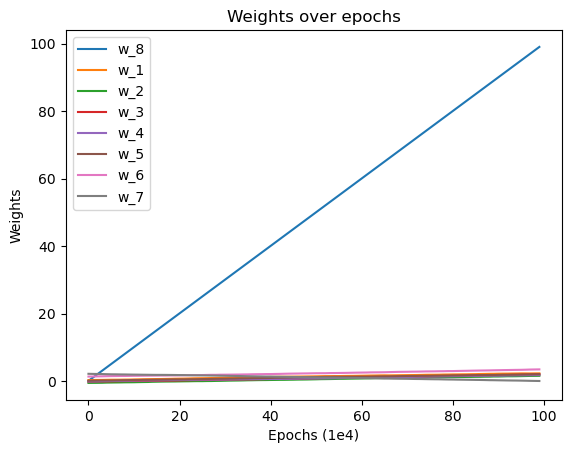

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(np.array(w_log)[:,-1], label='w_8')
plt.plot(np.array(w_log)[:,0], label='w_1')
plt.plot(np.array(w_log)[:,1], label='w_2')
plt.plot(np.array(w_log)[:,2], label='w_3')
plt.plot(np.array(w_log)[:,3], label='w_4')
plt.plot(np.array(w_log)[:,4], label='w_5')
plt.plot(np.array(w_log)[:,5], label='w_6')
plt.plot(np.array(w_log)[:,6], label='w_7')
plt.legend()
plt.xlabel('Epochs (1e4)')
plt.ylabel('Weights')
plt.title('Weights over epochs')
plt.show()

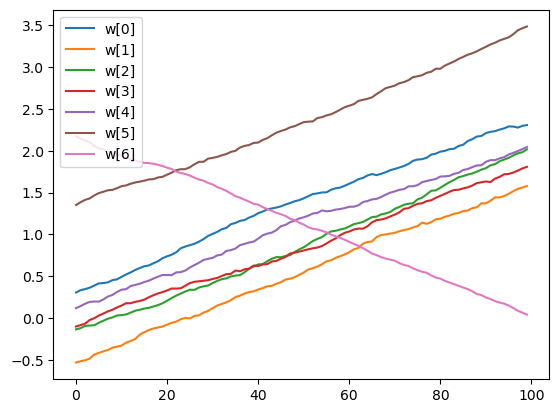

In [103]:
w_arr = np.array(w_log)  # shape: (num_samples, 8)
for i in range(7):
    plt.plot(w_arr[:, i], label=f'w[{i}]')
plt.legend()
plt.show()

# Findings
We can see that w_8 is the only parameter that increases at a larger  much larger rate than the others. w[6] is the only parameter that decreases.